# Loading/Installing Prerequisites
- pip install pylibjpeg pylibjpeg-libjpeg pylibjpeg-openjpeg
- numpy
- pandas 
- pytorch

In [1]:
!pip3 install torch==1.9.1+cu111 torchvision==0.10.1+cu111 torchaudio===0.9.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [2]:
!pip install opencv-contrib-python 

In [3]:
!pip install --user --upgrade numpy

In [4]:
!pip install numpy

In [89]:
import torchvision
import torch.nn as nn
import torch
import torch.nn.functional as F
from torchvision import transforms,models,datasets
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from torch import optim
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import cv2, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from fastai.vision.all import *

In [6]:
import numpy as np
from numpy import load
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Helper Functions

In [7]:
def get_table(filename):
    """[get pandas table from (un)compressed npz/npy format]

    Args:
        filename (string): [location string of the file(name)]

    Returns:
        [dataframe]: [pandas dataframe containing the numpy array(s)]
    """
    data = load(filename)
    lst = data.files
    df = pd.Dataframe()
    for item in lst:
        df[item] = data[item]
    print(df)
    return df

In [107]:
md1_df = pd.read_csv("metadata.csv") # metadata.csv
md_df = md1_df.copy()
for index, row in md1_df.iterrows():
    if row['Series Description'].startswith('ROI'):
        md_df = md_df.drop(index)
md_df.head()

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
1,1.3.6.1.4.1.9590.100.1.2.374115997511889073021386151921807063992,CBIS-DDSM,NaN,httpsdoi.org10.7937K9TCIA.2016.7O02S9CY,Calc-Test_P_00038_LEFT_CC,1.3.6.1.4.1.9590.100.1.2.85935434310203356712688695661986996009,NaN,08-29-2017,full mammogram images,NaN,MG,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,1,27.84 MB,./CBIS-DDSM/Calc-Test_P_00038_LEFT_CC/08-29-2017-DDSM-NA-96009/1.000000-full mammogram images-63992,2021-10-09T14:17:03.905
2,1.3.6.1.4.1.9590.100.1.2.174390361112646747718661211471328897934,CBIS-DDSM,NaN,httpsdoi.org10.7937K9TCIA.2016.7O02S9CY,Calc-Test_P_00038_LEFT_MLO,1.3.6.1.4.1.9590.100.1.2.384159464510350889125645400702639717613,NaN,08-29-2017,full mammogram images,NaN,MG,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,1,28.97 MB,./CBIS-DDSM/Calc-Test_P_00038_LEFT_MLO/08-29-2017-DDSM-NA-17613/1.000000-full mammogram images-97934,2021-10-09T14:17:07.653
4,1.3.6.1.4.1.9590.100.1.2.263861248711313923336051913560309963304,CBIS-DDSM,NaN,httpsdoi.org10.7937K9TCIA.2016.7O02S9CY,Calc-Test_P_00038_RIGHT_CC,1.3.6.1.4.1.9590.100.1.2.177706148911820252341905176394069228468,NaN,08-29-2017,full mammogram images,NaN,MG,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,1,25.73 MB,./CBIS-DDSM/Calc-Test_P_00038_RIGHT_CC/08-29-2017-DDSM-NA-28468/1.000000-full mammogram images-63304,2021-10-09T14:17:10.875
8,1.3.6.1.4.1.9590.100.1.2.44262460211112930513355519060642708846,CBIS-DDSM,NaN,httpsdoi.org10.7937K9TCIA.2016.7O02S9CY,Calc-Test_P_00038_RIGHT_MLO,1.3.6.1.4.1.9590.100.1.2.328421320411501709324953698601549885215,NaN,08-29-2017,full mammogram images,NaN,MG,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,1,27.64 MB,./CBIS-DDSM/Calc-Test_P_00038_RIGHT_MLO/08-29-2017-DDSM-NA-85215/1.000000-full mammogram images-08846,2021-10-09T14:17:16.485
11,1.3.6.1.4.1.9590.100.1.2.272917492411709393015036949944104292812,CBIS-DDSM,NaN,httpsdoi.org10.7937K9TCIA.2016.7O02S9CY,Calc-Test_P_00041_LEFT_CC,1.3.6.1.4.1.9590.100.1.2.69692063913639875309068650720468252275,NaN,08-29-2017,full mammogram images,NaN,MG,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,1,45.13 MB,./CBIS-DDSM/Calc-Test_P_00041_LEFT_CC/08-29-2017-DDSM-NA-52275/1.000000-full mammogram images-92812,2021-10-09T14:17:22.603


# Convert DICOM/PNG File into Numpy Array
Raddar. “Convert DICOM to Np.array - the Correct Way.” Kaggle, Kaggle, 30 Dec. 2020, https://www.kaggle.com/raddar/convert-dicom-to-np-array-the-correct-way/notebook. 

In [108]:
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut

In [109]:
def read_xray(path, size=299, voi_lut = False, fix_monochrome = True):
    """converts the dicom/png file into numpy array

    Args:
        path (string): path to file
        size (int, optional): [description]. Defaults to 255.
        voi_lut (bool, optional): [description]. Defaults to True.
        fix_monochrome (bool, optional): [description]. Defaults to True.

    Returns:
        [numpy array]: [numpy array containing dicom info]
    """
    dicom = pydicom.read_file(path)
    
    # VOI LUT (if available by DICOM device) is used to transform raw DICOM data to "human-friendly" view
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
               
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
        
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * size).astype(np.uint8)
        
    return data

 Testing picture output

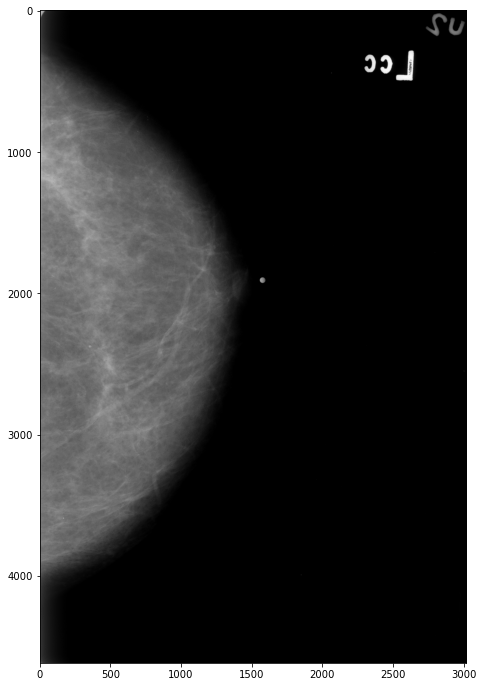

In [110]:
%matplotlib inline
img = read_xray(md_df["File Location"][1] + "/1-1.dcm")
plt.figure(figsize=(12,12))
plt.imshow(img,"gray")

In [111]:
# load calc case test set and training test
calc_test = pd.read_csv("calc_case_description_test_set.csv")
calc_train = pd.read_csv("calc_case_description_train_set.csv")

# Creating Testing and Training Sets

In [112]:
column_names = ["new id", "location","density"]
test = pd.DataFrame(columns = column_names)
train = pd.DataFrame(columns = column_names)
for index, row in md_df.iterrows():
    new_id = row['Study UID'] + '/' + row['Series UID']
    # pattern matching, finding density information
    if calc_test['image file path'].str.contains(new_id).any():
        image_file = calc_test.loc[calc_test['image file path'].str.contains(new_id)]
        df2 = {
            "new id": new_id,
            "location": row['File Location'], 
            "density": image_file[["breast density"]].values[0][0]
        }
        test = test.append(df2,ignore_index=True)
    elif calc_test['cropped image file path'].str.contains(new_id).any():
        cropped_image_file = calc_test.loc[calc_test['cropped image file path'].str.contains(new_id)]
        df2 = {
            "new id": new_id,
            "location": row['File Location'], 
            "density": cropped_image_file[["breast density"]].values[0][0]
        }
        test = test.append(df2,ignore_index=True)
    elif calc_train['image file path'].str.contains(new_id).any():
        image_file = calc_train.loc[calc_train['image file path'].str.contains(new_id)]
        df2 = {
            "new id": new_id,
            "location": row['File Location'], 
            "density": image_file[["breast density"]].values[0][0]
        }
        train = train.append(df2, ignore_index=True)
    elif calc_train['cropped image file path'].str.contains(new_id).any():
        cropped_image_file = calc_train.loc[calc_train['cropped image file path'].str.contains(new_id)]
        df2 = {
            "new id": new_id,
            "location": row['File Location'], 
            "density": cropped_image_file[["breast density"]].values[0][0]
        }
        train = train.append(df2, ignore_index=True)



In [113]:
train.head()

,new id,location,density
0,1.3.6.1.4.1.9590.100.1.2.328778919012412769218080124214088709081/1.3.6.1.4.1.9590.100.1.2.393344010211719049419601138200355094682,./CBIS-DDSM/Calc-Training_P_00005_RIGHT_CC_1/08-30-2017-DDSM-NA-09081/1.000000-cropped images-94682,3
1,1.3.6.1.4.1.9590.100.1.2.408909860712120272633130274602115723157/1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548,./CBIS-DDSM/Calc-Training_P_00005_RIGHT_CC/08-07-2016-DDSM-NA-23157/1.000000-full mammogram images-38548,3
2,1.3.6.1.4.1.9590.100.1.2.427517897311902339923511678883689433338/1.3.6.1.4.1.9590.100.1.2.250596608311207922527805669693579696727,./CBIS-DDSM/Calc-Training_P_00005_RIGHT_MLO/08-07-2016-DDSM-NA-33338/1.000000-full mammogram images-96727,3
3,1.3.6.1.4.1.9590.100.1.2.201322325113694962619881476352450072222/1.3.6.1.4.1.9590.100.1.2.228699627313487111012474405462022068297,./CBIS-DDSM/Calc-Training_P_00007_LEFT_CC/08-07-2016-DDSM-NA-72222/1.000000-full mammogram images-68297,4
4,1.3.6.1.4.1.9590.100.1.2.370479499712916693322010643793108454887/1.3.6.1.4.1.9590.100.1.2.104743410411133110629448544090466900446,./CBIS-DDSM/Calc-Training_P_00007_LEFT_MLO/08-07-2016-DDSM-NA-54887/1.000000-full mammogram images-00446,4


## Problem 1
Here we encountered a problem where the testing set is bigger than the training set, since they are all images, I decided to merge them all together, then split the new training/testing set

In [114]:
total = test.append(train, ignore_index=True)
total.head()
total.to_csv("total.csv")

## Change Density 
to transform this into a binary problem

In [115]:
new_total = total.copy()
for index, row in total.iterrows():
    if row['density'] == 1 or row['density'] == 2:
        new_total.loc[index,'density'] =  0
    elif row['density'] == 3 or row['density'] == 4:
        new_total.loc[index,'density'] = 1

new_total.head()

,new id,location,density
0,1.3.6.1.4.1.9590.100.1.2.85935434310203356712688695661986996009/1.3.6.1.4.1.9590.100.1.2.374115997511889073021386151921807063992,./CBIS-DDSM/Calc-Test_P_00038_LEFT_CC/08-29-2017-DDSM-NA-96009/1.000000-full mammogram images-63992,0
1,1.3.6.1.4.1.9590.100.1.2.384159464510350889125645400702639717613/1.3.6.1.4.1.9590.100.1.2.174390361112646747718661211471328897934,./CBIS-DDSM/Calc-Test_P_00038_LEFT_MLO/08-29-2017-DDSM-NA-17613/1.000000-full mammogram images-97934,0
2,1.3.6.1.4.1.9590.100.1.2.177706148911820252341905176394069228468/1.3.6.1.4.1.9590.100.1.2.263861248711313923336051913560309963304,./CBIS-DDSM/Calc-Test_P_00038_RIGHT_CC/08-29-2017-DDSM-NA-28468/1.000000-full mammogram images-63304,0
3,1.3.6.1.4.1.9590.100.1.2.328421320411501709324953698601549885215/1.3.6.1.4.1.9590.100.1.2.44262460211112930513355519060642708846,./CBIS-DDSM/Calc-Test_P_00038_RIGHT_MLO/08-29-2017-DDSM-NA-85215/1.000000-full mammogram images-08846,0
4,1.3.6.1.4.1.9590.100.1.2.69692063913639875309068650720468252275/1.3.6.1.4.1.9590.100.1.2.272917492411709393015036949944104292812,./CBIS-DDSM/Calc-Test_P_00041_LEFT_CC/08-29-2017-DDSM-NA-52275/1.000000-full mammogram images-92812,0


## Spliting total datasets into test sets and training sets

In [116]:
from sklearn.model_selection import train_test_split

new_train, new_test = train_test_split(new_total, test_size=0.25, shuffle=True)

In [117]:
new_train = new_train.reset_index()
new_test = new_test.reset_index()
new_train.to_csv("train.csv")
new_test.to_csv("test.csv")

# Preparing Training and Testing Images

In [119]:

i = 0
for index, row in new_train.iterrows():
    if row['density'] == 0:
        for file in glob(row['location'] + "/" + "*.dcm"):
            array = read_xray(file)
            im = Image.fromarray(array)
            im.save("./images/train_set/not/" + str(i)+".jpg")
    elif row['density'] == 1:
        for file in glob(row['location'] + "/" + "*.dcm"):
            array = read_xray(file)
            im = Image.fromarray(array)
            im.save("./images/train_set/dense/d" + str(i)+".jpg")
    i += 1

i = 0
for index, row in new_test.iterrows():
    if row['density'] == 0:
        for file in glob(row['location'] + "/" + "*.dcm"):
            array = read_xray(file)
            im = Image.fromarray(array)
            im.save("./images/test_set/not/" + str(i)+".jpg")
    elif row['density'] == 1:
        for file in glob(row['location'] + "/" + "*.dcm"):
            array = read_xray(file)
            im = Image.fromarray(array)
            im.save("./images/test_set/dense/d" + str(i)+".jpg")
    i += 1


In [120]:
"""
import os
i = 0
for file in glob("./images/test_set/dense/"+"*.jpg"):
    os.rename(file,'./images/test_set/dense/d'+str(i)+'.jpg')
    i += 1
"""

'\nimport os\ni = 0\nfor file in glob("./images/test_set/dense/"+"*.jpg"):\n    os.rename(file,\'./images/test_set/dense/d\'+str(i)+\'.jpg\')\n    i += 1\n'

# Creating a ResNet Architecture with PyTorch and Fastai

In [135]:
train_data_dir = "./train_set/"
test_data_dir = "./test_set/"

files = get_image_files("./images")
len(files)

443

In [136]:
files[0], files[6]

(Path('images/test_set/dense/d0.jpg'), Path('images/test_set/dense/d108.jpg'))

In [137]:
def label_func(f):
    return f[0].startswith('d')

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


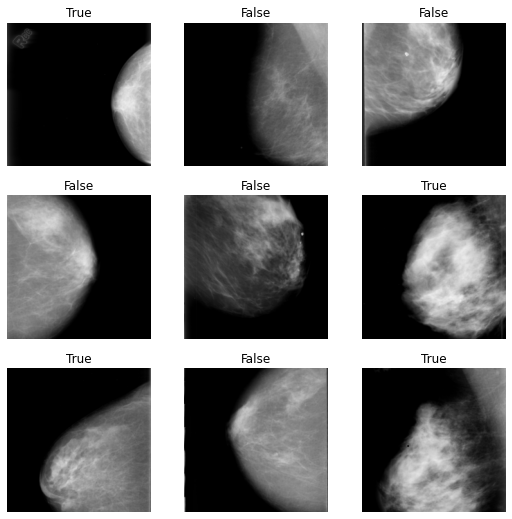

In [141]:
dls = ImageDataLoaders.from_name_func("./images/",files,label_func,item_tfms=Resize(224))
dls.show_batch()

In [142]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,1.347869,0.587333,0.750000,00:49


epoch,train_loss,valid_loss,accuracy,time
0,0.863982,0.623807,0.715909,00:50


SuggestedLRs(valley=0.00019054606673307717)

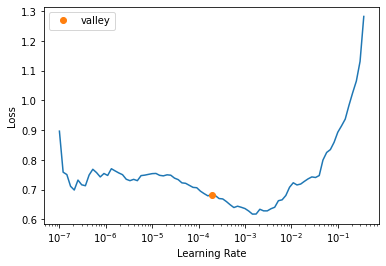

In [143]:
learn.lr_find()

In [144]:
learn.fine_tune(epochs=6, base_lr=0.00019054606673307717)

epoch,train_loss,valid_loss,accuracy,time
0,0.726163,0.633608,0.704545,00:50


epoch,train_loss,valid_loss,accuracy,time
0,0.816757,0.597288,0.693182,00:50
1,0.784403,0.566377,0.693182,00:50
2,0.794365,0.532923,0.715909,00:50
3,0.749693,0.554518,0.715909,00:50
4,0.722500,0.581177,0.727273,00:50
5,0.694456,0.579488,0.738636,00:50


# Result Visualization and Interpretation

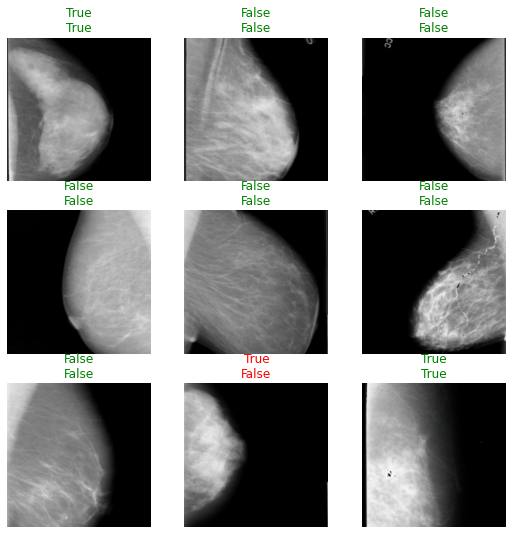

In [145]:
learn.show_results()

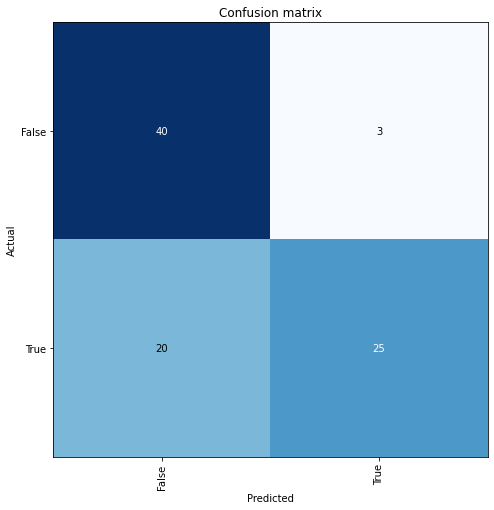

In [146]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(7,7))

In [147]:
learn.save("./stage1")

Path('images/models/stage1.pth')

In [160]:
preds,y, loss = learn.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))

The accuracy is 0.7386363744735718 %.


reference: https://www.kaggle.com/qitvision/a-complete-ml-pipeline-fast-ai

In [150]:
!pip install fastai==2.0.15
!pip install fastai2==0.0.30
!pip install fastcore==1.0.16.

  Attempting uninstall: fastai
    Found existing installation: fastai 2.5.2
    Uninstalling fastai-2.5.2:
      Successfully uninstalled fastai-2.5.2
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.3.26
    Uninstalling fastcore-1.3.26:
      Successfully uninstalled fastcore-1.3.26


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastdownload 0.0.5 requires fastcore>=1.3.26, but you have fastcore 1.0.16 which is incompatible.


# ROC Curve

In [161]:
from sklearn.metrics import roc_curve, auc
from fastai import *
from fastai.vision import *
from torchvision.models import * 
# probs from log preds
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 0.8914728682170543


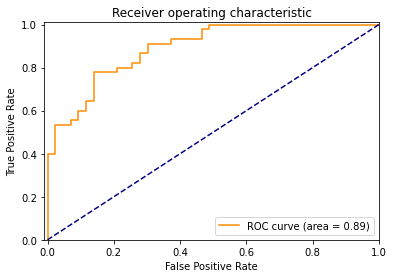

In [162]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Bootstrapping, Confidence Intervals and DeLong Test

In [189]:
from sklearn.metrics import roc_curve,roc_auc_score

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(tpr), len(tpr))

    score = roc_auc_score(y[indices], probs[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

Bootstrap #1 ROC area: 0.900
Bootstrap #2 ROC area: 0.883
Bootstrap #3 ROC area: 0.954
Bootstrap #4 ROC area: 0.959
Bootstrap #5 ROC area: 0.891
Bootstrap #6 ROC area: 0.733
Bootstrap #7 ROC area: 0.878
Bootstrap #8 ROC area: 0.959
Bootstrap #9 ROC area: 0.931
Bootstrap #10 ROC area: 0.925
Bootstrap #11 ROC area: 0.870
Bootstrap #12 ROC area: 0.878
Bootstrap #13 ROC area: 0.965
Bootstrap #14 ROC area: 0.908
Bootstrap #15 ROC area: 0.914
Bootstrap #16 ROC area: 0.943
Bootstrap #17 ROC area: 0.949
Bootstrap #18 ROC area: 0.911
Bootstrap #19 ROC area: 0.872
Bootstrap #20 ROC area: 0.861
Bootstrap #21 ROC area: 0.807
Bootstrap #22 ROC area: 0.938
Bootstrap #23 ROC area: 0.954
Bootstrap #24 ROC area: 0.918
Bootstrap #25 ROC area: 0.901
Bootstrap #26 ROC area: 0.862
Bootstrap #27 ROC area: 0.826
Bootstrap #28 ROC area: 0.923
Bootstrap #29 ROC area: 0.952
Bootstrap #30 ROC area: 0.885
Bootstrap #31 ROC area: 0.968
Bootstrap #32 ROC area: 0.906
Bootstrap #33 ROC area: 0.800
Bootstrap #34 ROC a

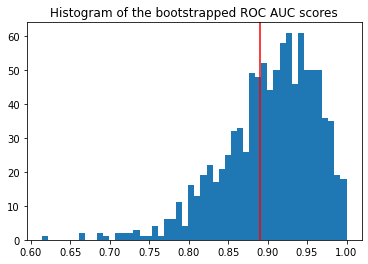

In [191]:
import matplotlib.pyplot as plt
plt.hist(bootstrapped_scores, bins=50)
plt.axvline(x=0.89, color='red')
plt.title('Histogram of the bootstrapped ROC AUC scores')
plt.show()

In [192]:
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

Confidence interval for the score: [0.800 - 0.982]
